<a href="https://colab.research.google.com/github/wessware/pytorch-101/blob/main/pytorch_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import copy
 
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

import tqdm

from sklearn.metrics import roc_curve
from sklearn.model_selection import StratifiedKFold, train_test_split

In [2]:
df = pd.read_csv('/content/sample_data/synthesized_loan_data.csv', index_col=None)

In [3]:
df.shape

(4000, 12)

In [4]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1.015491,0,0,60,2263.426739,120.264574,362.034926,0.999618,2,1
1,1,1,2.793550,1,2,299,207.078743,97.333547,185.855127,0.994450,1,1
2,0,0,1.020575,0,1,497,-222.105153,98.957504,361.411489,0.999132,0,1
3,1,1,0.967628,0,0,35,1874.200797,141.121981,360.427013,0.999273,2,1
4,1,1,1.929354,0,0,340,47.080906,322.936778,360.013915,0.979882,0,1


In [5]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.isnull().any()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             4000 non-null   int64  
 1   Married            4000 non-null   int64  
 2   Dependents         4000 non-null   float64
 3   Education          4000 non-null   int64  
 4   Self_Employed      4000 non-null   int64  
 5   ApplicantIncome    4000 non-null   int64  
 6   CoapplicantIncome  4000 non-null   float64
 7   LoanAmount         4000 non-null   float64
 8   Loan_Amount_Term   4000 non-null   float64
 9   Credit_History     4000 non-null   float64
 10  Property_Area      4000 non-null   int64  
 11  Loan_Status        4000 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 375.1 KB


In [8]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
x_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 
          'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

x = df[x_cols]          
y = df['Loan_Status'].values

In [10]:
x.values

array([[ 1.00000000e+00,  1.00000000e+00,  1.01549140e+00, ...,
         3.62034926e+02,  9.99617663e-01,  2.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  2.79355014e+00, ...,
         1.85855127e+02,  9.94449593e-01,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.02057543e+00, ...,
         3.61411489e+02,  9.99131735e-01,  0.00000000e+00],
       ...,
       [ 1.00000000e+00,  1.00000000e+00,  1.01515374e-02, ...,
         3.61722296e+02,  9.94602628e-01,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00, -2.62509894e-03, ...,
         3.60723093e+02,  9.89028651e-01,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  7.27098969e-03, ...,
         3.60276315e+02,  9.97789395e-01,  1.00000000e+00]])

In [11]:
y

array([1, 1, 1, ..., 1, 0, 1])

In [12]:
x = torch.tensor(x.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [13]:
class Wide(nn.Module):
  
  def __init__(self):
    super().__init__()
    self.hidden = nn.Linear(11, 66)
    self.relu = nn.ReLU()

    self.output = nn.Linear(66, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.relu(self.hidden(x))
    x = self.sigmoid(self.output(x))

    return x 

In [14]:
class Deep(nn.Module):

  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(11, 11)
    self.act1 = nn.ReLU()

    self.layer2 = nn.Linear(11, 11)
    self.act2 = nn.ReLU()

    self.layer3 = nn.Linear(11, 11)
    self.act3 = nn.ReLU()

    self.output = nn.Linear(11, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.act1(self.layer1(x))
    x = self.act2(self.layer2(x))
    x = self.act3(self.layer3(x))
    x = self.sigmoid(self.output(x))

    return x 

In [15]:
model_1 = Wide()
model_2 = Deep()

print(sum([x.reshape(-1).shape[0] for x in model_1.parameters()]))
print(sum([x.reshape(-1).shape[0] for x in model_2.parameters()]))

859
408


In [16]:
def model_trainer_func(model, x_train, y_train, x_valid, y_valid):


  loss_func = nn.BCELoss() #binary cross entropy loss function
  optimizer = optim.Adam(model.parameters(), lr=0.0001) #adam optimizer with learning rate 

  n_epochs = 300
  batch_size = 10
  batch_start = torch.arange(0, len(x_train), batch_size)

  best_accuracy = -np.inf
  best_weights = None

  for epoch in range(n_epochs):

    model.train()

    with tqdm.tqdm(batch_start, unit='batch', mininterval=0, disable=True) as bar:
      bar.set_description(f"Epoch {epoch}")

      for start in bar:
        x_batch = x_train[start : start + batch_size]
        y_batch = y_train[start : start + batch_size]

        y_pred = model(x_batch)
        loss = loss_func(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

        acc = (y_pred.round() == y_batch).float().mean()
        bar.set_postfix(
            loss = float(loss), 
            acc = float(acc)
        )

    model.eval()
    y_pred = model(x_valid)
    acc = (y_pred.round() == y_valid).float().mean()
    acc = float(acc)

    if acc > best_accuracy:
      best_accuracy = acc
      best_weights = copy.deepcopy(model.state_dict())
  
  model.load_state_dict(best_weights)

  return best_accuracy


In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, shuffle=True)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([2800, 11])
torch.Size([1200, 11])
torch.Size([2800, 1])
torch.Size([1200, 1])


In [19]:
k_fold = StratifiedKFold(n_splits=5, shuffle=True)

In [20]:
cv_scores_wide = []

for train, test in k_fold.split(X_train, y_train):

  model = Wide()

  acc = model_trainer_func(model, X_train[train], y_train[train], X_train[test], y_train[test])

  print('Accuracy (wide): %.2f' % acc)

  cv_scores_wide.append(acc)

Accuracy (wide): 0.90
Accuracy (wide): 0.89
Accuracy (wide): 0.90
Accuracy (wide): 0.89
Accuracy (wide): 0.88


In [21]:
cv_scores_deep = []

for train, test in k_fold.split(X_train, y_train):

  model = Deep()

  acc = model_trainer_func(model, X_train[train], y_train[train], X_train[test], y_train[test])

  print('Accuracy (deep): %.2f' % acc)

  cv_scores_deep.append(acc)


Accuracy (deep): 0.89
Accuracy (deep): 0.87
Accuracy (deep): 0.89
Accuracy (deep): 0.89
Accuracy (deep): 0.89


In [22]:
wide_acc = np.mean(cv_scores_wide)
wide_std = np.std(cv_scores_wide)

deep_acc = np.mean(cv_scores_deep)
deep_std = np.std(cv_scores_deep)

print('Wide: %.3f%% (+/- %.3f%%)' % (wide_acc*100, wide_std*100))
print('Deep: %.3f%% (+/- %.3f%%)' % (deep_acc*100, deep_std*100))

Wide: 89.357% (+/- 0.787%)
Deep: 88.607% (+/- 0.954%)


In [23]:
if wide_acc > deep_acc:
  print('Train wide model again!')
  model = Wide()
else:
  print('Train deep model again!')
  model = Deep()

acc = model_trainer_func(model, X_train, y_train, X_test, y_test)

print(f'Final Model Accuracy: {acc*100:.2f}%')

Train wide model again!
Final Model Accuracy: 90.58%


In [24]:
model.eval()

with torch.no_grad():

  for i in range(5):
    y_pred = model(X_test[i:i+1])
    print(f'{X_test[i].numpy()} -> {y_pred[0].numpy()} (expected {y_test[i].numpy()})')

[1.0000000e+00 1.0000000e+00 2.0300503e+00 0.0000000e+00 1.0000000e+00
 4.1800000e+02 9.2572969e+03 2.3152983e+02 3.6026712e+02 9.9452597e-01
 0.0000000e+00] -> [0.97551733] (expected [1.])
[0.0000000e+00 0.0000000e+00 7.6472893e-02 0.0000000e+00 0.0000000e+00
 7.4000000e+01 2.0054139e+03 7.0269043e+01 3.6174362e+02 9.8860800e-01
 0.0000000e+00] -> [0.90013933] (expected [1.])
[ 1.0000000e+00  0.0000000e+00 -1.3368432e-03  1.0000000e+00
  0.0000000e+00  1.2300000e+02  1.6541571e+02  1.0109142e+02
  3.6381442e+02  9.9629444e-01  0.0000000e+00] -> [0.761963] (expected [1.])
[ 1.0000000e+00  0.0000000e+00 -1.5192738e-02  0.0000000e+00
  0.0000000e+00  2.2100000e+02  2.7338696e+03  1.1920833e+02
  3.6130249e+02  9.9186218e-01  2.0000000e+00] -> [0.9377089] (expected [1.])
[ 0.00000000e+00  0.00000000e+00 -1.54230483e-02  0.00000000e+00
  0.00000000e+00  1.16000000e+02  1.02640724e+02  8.37852631e+01
  3.58211761e+02  9.92743790e-01  0.00000000e+00] -> [0.8971067] (expected [1.])


In [28]:
model.eval()

with torch.no_grad():

  for i in range(20):
    y_pred = model(X_test[i:i+1])
    print(f'{X_test[i].numpy()} -> {y_pred[0].numpy()} (expected {y_test[i].numpy()})')

[1.0000000e+00 1.0000000e+00 2.0300503e+00 0.0000000e+00 1.0000000e+00
 4.1800000e+02 9.2572969e+03 2.3152983e+02 3.6026712e+02 9.9452597e-01
 0.0000000e+00] -> [0.97551733] (expected [1.])
[0.0000000e+00 0.0000000e+00 7.6472893e-02 0.0000000e+00 0.0000000e+00
 7.4000000e+01 2.0054139e+03 7.0269043e+01 3.6174362e+02 9.8860800e-01
 0.0000000e+00] -> [0.90013933] (expected [1.])
[ 1.0000000e+00  0.0000000e+00 -1.3368432e-03  1.0000000e+00
  0.0000000e+00  1.2300000e+02  1.6541571e+02  1.0109142e+02
  3.6381442e+02  9.9629444e-01  0.0000000e+00] -> [0.761963] (expected [1.])
[ 1.0000000e+00  0.0000000e+00 -1.5192738e-02  0.0000000e+00
  0.0000000e+00  2.2100000e+02  2.7338696e+03  1.1920833e+02
  3.6130249e+02  9.9186218e-01  2.0000000e+00] -> [0.9377089] (expected [1.])
[ 0.00000000e+00  0.00000000e+00 -1.54230483e-02  0.00000000e+00
  0.00000000e+00  1.16000000e+02  1.02640724e+02  8.37852631e+01
  3.58211761e+02  9.92743790e-01  0.00000000e+00] -> [0.8971067] (expected [1.])
[  1.     

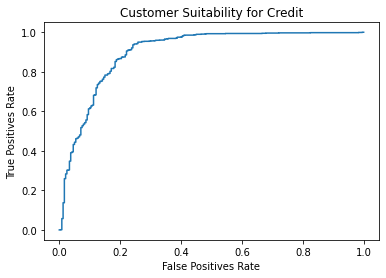

In [29]:
with torch.no_grad():
    
    y_pred = model(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    plt.plot(fpr, tpr) 
    plt.title('Customer Suitability for Credit')
    plt.xlabel("False Positives Rate")
    plt.ylabel("True Positives Rate")
    
    plt.show()